In [4]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# &#128013; [One Point Tutorial] Visualization II - `seaborn`
<p style='text-align: right;'> Python을 활용한 데이터 시각화 </p>
<p style='text-align: right;'> December, 2019</p>

---

## 2. *<font color="green">seaborn</font>* 을 배워 보자 !

- **seaborn이란?**  
Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

### 학습 목표
`seaborn`의 핵심적인 시각화 기법을 이해하고 활용함

### 목차
 1. Scatter Plot
 2. Box Plot
 3. Violin Plot
 4. Bar Plot
 5. Rug plot
 6. KDe Plot(Line Histogram)
 7. Count Plot
 8. Joint Plot
 9. Pair Plot
 10. Reg plot & LM Plot
 

### Import module (모듈 설치 후 불러오기)
seaborn 모듈이 설치 안 되어 있다면, 설치부터 하기!

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import os

In [3]:
try:
    os.chdir("/Users/wooseoksong/Desktop/191220")
    print("Current Working Directory is changed.")
except OSError:
    print("Can't change Current Working Directory.") 

Current Working Directory is changed.


### Import data
seaborn 패키지에는 데이터들이 내장되어 있다.<br>
불러와보자!

In [2]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [3]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [4]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [7]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [8]:
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

### 2.1.  <font color="royalblue">Scatter Plot</font>

#### 2.1.1. <font color="royalblue">첫번째 그래프</font>: 분석하고자 하는 데이터가 numerical 일 때 !

>**사용 방법 :**  
>1. sns.relplot(`x축 데이터`,`y축 데이터`,`data`)
>2. sns.scatterplot(`data`,`x축 데이터`,`y축 데이터`)

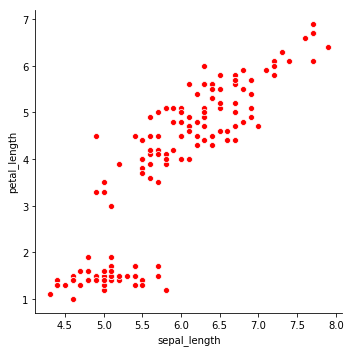

In [11]:
sns.relplot(x="sepal_length", y="petal_length", data=iris, color="red")

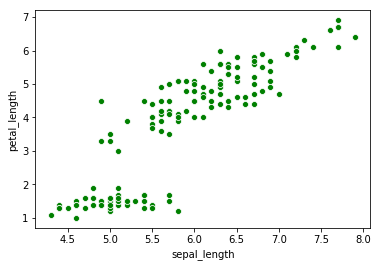

In [12]:
sns.scatterplot(x="sepal_length", y="petal_length", data=iris, color="green")

보이기에 따라서 조금 차이가 있지만 둘 다 scatter plot(산포도)을 그리고 있다.
* 카테고리형 변수가 섞여 있는 경우!<br>
`hue` 파라미터에 카테고리 변수 이름을 지정하면 카테고리 값에 따라 색상이 달라짐    
`style` 파라미터에 카테고리 변수 이름을 지정하면 카테고리 값에 따라 모양이 달라짐

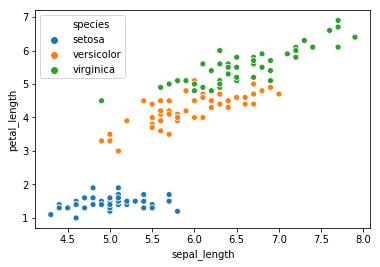

In [14]:
sns.scatterplot(x="sepal_length", y="petal_length", data=iris,hue="species")

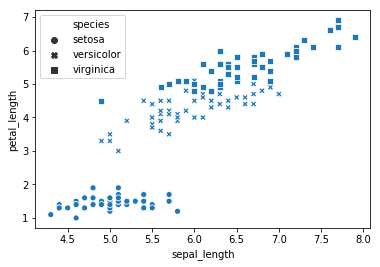

In [15]:
sns.scatterplot(x="sepal_length", y="petal_length",data=iris, style="species")

- 실수형 데이터 또한 함께 표현하고 싶은 경우!<br>
`hue`에 numerical 변수 이름을 지정하면 변수 값에 따라 색상이 달라짐<br>
`size`에 numerical 변수 이름을 지정하면 변수 값에 따라 크기가 달라짐

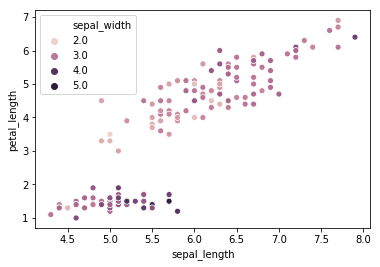

In [16]:
sns.scatterplot(x="sepal_length", y="petal_length",data=iris,hue="sepal_width")

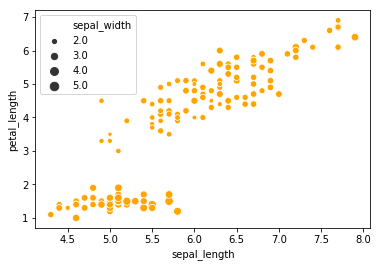

In [18]:
sns.scatterplot(x="sepal_length", y="petal_length",data=iris,size="sepal_width", color="orange")

#### 2.1.2. <font color="royalblue">두 그래프</font>: 분석하고자 하는 데이터가 categorical 일 때 !

>**사용 방법:**<br>
>sns.catplot(x축 데이터,y축 데이터,data)

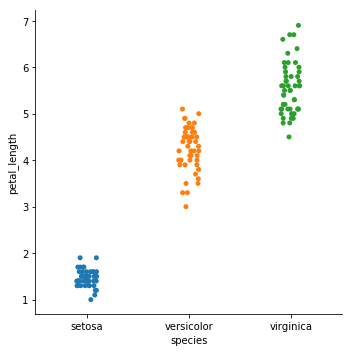

In [22]:
sns.catplot(x="species", y="petal_length",data=iris) # 종류에 따른 전체 지불 금액

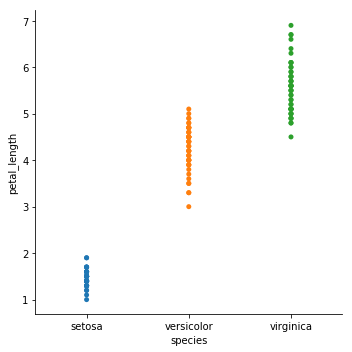

In [24]:
sns.catplot(x="species", y="petal_length",data=iris, jitter=False)
# 종류에 따른 전체 지불 금액
# jitter 인자를 False로 설정하여 결과를 일직선으로 나타낼 수 있음

#### 여기서 잠깐 ! 비슷한 형태의 plot들을 살펴보고 넘어가자.

* stripplot  
stripplot은 마치 스캐터 플롯처럼 모든 데이터를 점으로 그려준다.  
사용 방법:  
sns.stripplot(`x축 데이터`,`y축 데이터`,`data`)

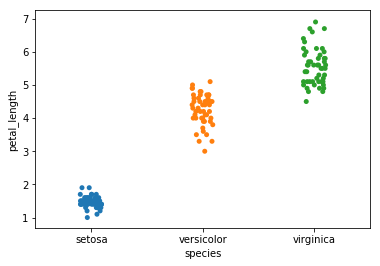

In [25]:
sns.stripplot(x="species", y="petal_length",data=iris)

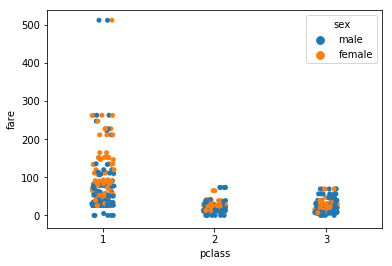

In [27]:
sns.stripplot(x="pclass", y="fare",data=titanic, hue="sex", jitter=True) # hue 추가 가능

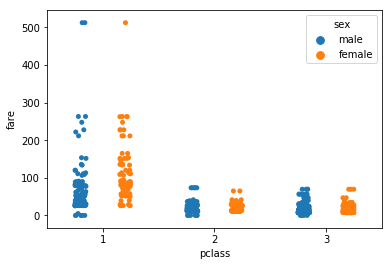

In [29]:
sns.stripplot(x="pclass", y="fare",data=titanic, hue="sex",
              jitter=True, dodge=True) 
# dodge 옵션 쓰면 남여 따로 볼 수 있음

* swamplot  
swarmplot은 stripplot과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동
사용 방법:  
sns.swarmplot(`x축 데이터`,`y축 데이터`,`data`)

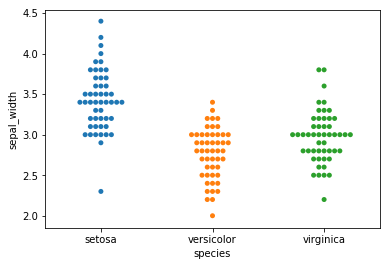

In [30]:
sns.swarmplot(x="species", y="sepal_width", data=iris)

#### 다시 catplot으로!

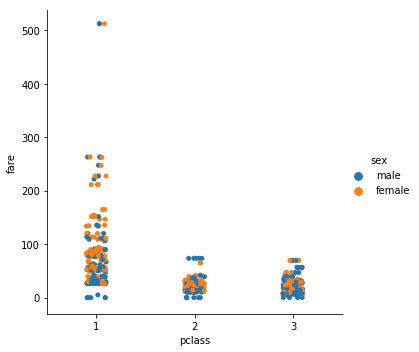

In [31]:
sns.catplot(x="pclass",y="fare", hue='sex',data=titanic) 
# 역시 hue 파라미터에 categorical 변수 지정 가능
# 성별에 따라 색이 달라짐

### 2.2. <font color="royalblue">Box Plot</font>

박스는 실수 값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻하고, 3사분위수와 1사분수의 차이(Q3 - Q1)는 IQR이라고 한다. <br> 
1사분위 수보다 1.5 x IQR 만큼 낮은 값과 3사분위 수보다 1.5 x IQR 만큼 높은 값의 구간을 기준으로 그 바깥의 점은 outlier(이상치)이다.

>**사용 방법:**<br>
>sns.catplot(`x축 데이터`, `y축 데이터`, kind=`box`, `data`)

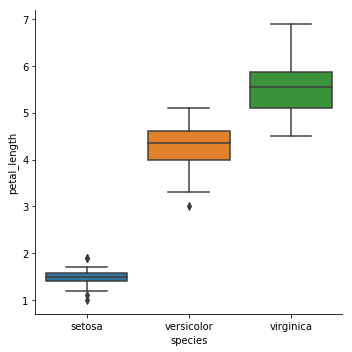

In [34]:
sns.catplot(x="species", y="petal_length", kind="box", data=iris)

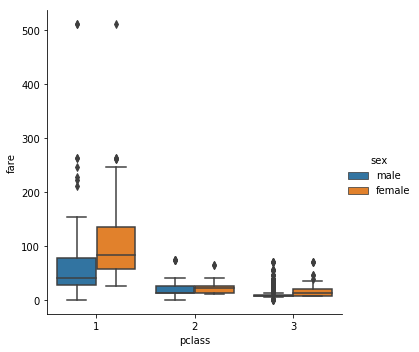

In [36]:
sns.catplot(x="pclass", y="fare", hue="sex", kind="box", data=titanic) #hue 파라미터 추가

### 2.3. <font color="royalblue">Violin Plot</font>

`boxplot`은 분포의 간략한 특성만 보여주지만 `violinplot`은 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점이 있다.<br>
`violinplot`은 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보인다고 하여 붙은 이름이다.

>**사용 방법:**<br>
>sns.violinplot(x축 데이터,y축 데이터,data)

C:\Users\sseve\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


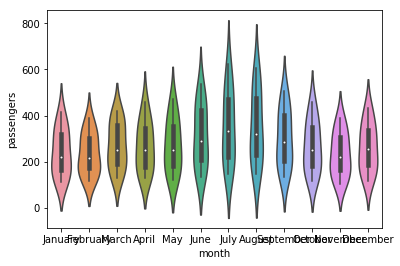

In [41]:
sns.violinplot(x="month", y="passengers", data=flights)

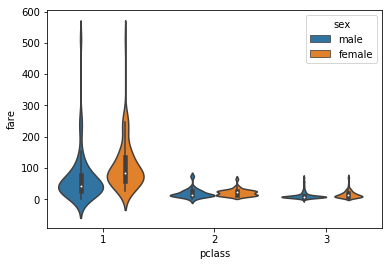

In [42]:
sns.violinplot(x="pclass", y="fare", hue="sex", data=titanic) # hue 파라미터 추가 가능

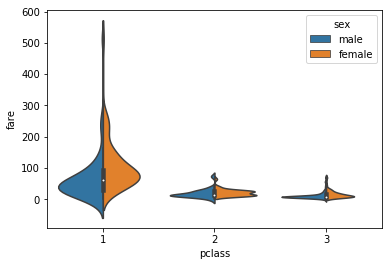

In [43]:
sns.violinplot(x="pclass", y="fare", hue="sex", data=titanic, split=True) # split 옵션 추가하면 반은 남자, 반은 여자로!

### 2.4. <font color="royalblue">Bar Plot</font>

카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성  

>**사용 방법:**<br>
>sns.barplot(`x축 데이터`,`y축 데이터`,`data`)

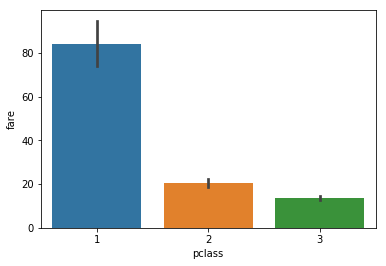

In [44]:
sns.barplot(x="pclass", y="fare", data=titanic)

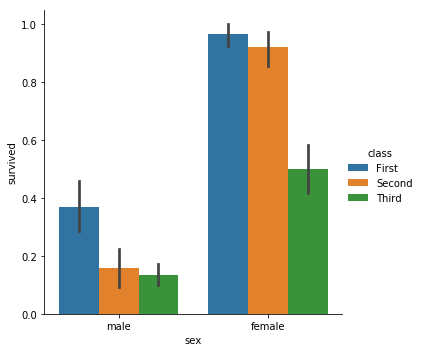

In [37]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic) #catplot에 kind="bar"를 이용

### 2.5. <font color="royalblue">Rug Plot</font>

러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여줌

>**사용 방법:**<br>
>sns.rugplot(`data`)

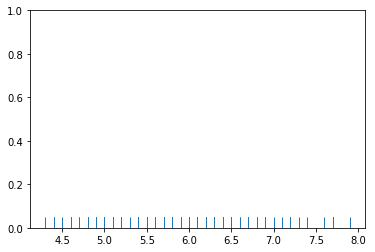

In [45]:
sns.rugplot(iris.sepal_length.values)

In [46]:
iris.petal_width.values

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

### 2.6. <font color="royalblue">KDe Plot</font>

히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법  

>**사용 방법:**<br>
>sns.kdeplot(`data`)

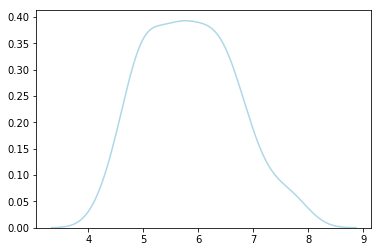

In [47]:
sns.kdeplot(iris.sepal_length.values, color="lightblue")

* dist plot  
러그 + 커널 밀도 + 히스토그램 표시 기능  
사용 방법 :  
sns.`distplot`(`data`, `kde`=True or False, `rug`=True or False)

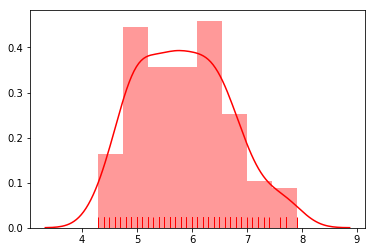

In [48]:
sns.distplot(iris.sepal_length.values, kde=True, rug=True, color="red")

### 2.7. <font color="royalblue">Count Plot</font>

각 카테고리 값별로 데이터가 얼마나 있는지 표시 가능 (빈도 수를 그래프에 표시)

>**사용 방법:**<br>
>sns.countplot(x=column_name, data)

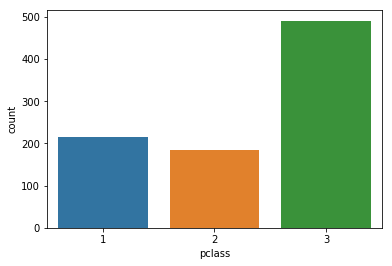

In [49]:
sns.countplot(x="pclass", data=titanic)

class별 승객 수를 나타낼 수 있다.

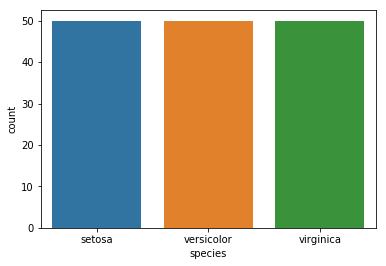

In [50]:
sns.countplot(x="species", data=iris)

요일별 팁을 준 횟수를 알 수 있다.

### 2.8. <font color="royalblue">Joint Plot</font>

스캐터 플롯뿐 아니라 차트의 가장자리(margin)에 각 변수의 히스토그램도 그린다.
>**사용 방법:**<br>
>sns.jointplot(x, y, data, kind)

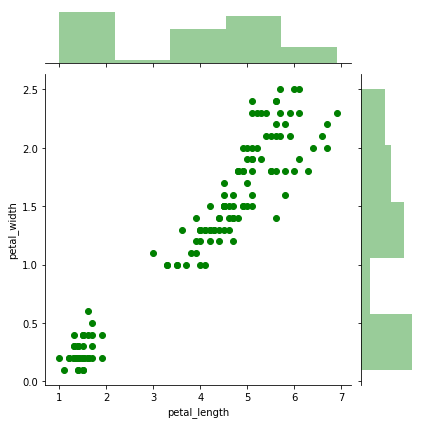

In [52]:
sns.jointplot(x="petal_length",y="petal_width",data=iris, color="green") #kind = 'scatter' 일 때

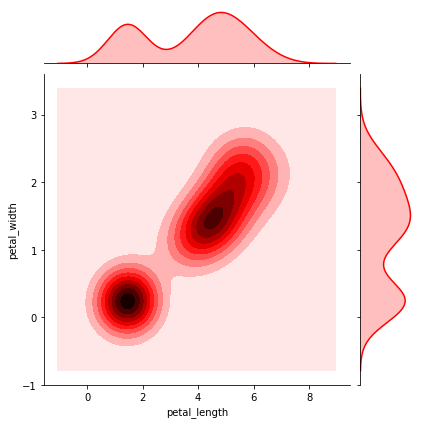

In [53]:
sns.jointplot(x="petal_length", y="petal_width", data=iris, kind="kde", color="red") #kind = 'kde' 일 때

### 2.9. <font color="royalblue">Pair Plot</font>

3차원 이상의 데이터라면 seaborn 패키지의 pairplot 명령을 사용하자.<br>
pairplot은 데이터프레임을 인수로 받아 그리드 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그려준다.<br>
같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 생성한다.

>**사용 방법:**<br>
>sns.sns.pairplot(`data`)

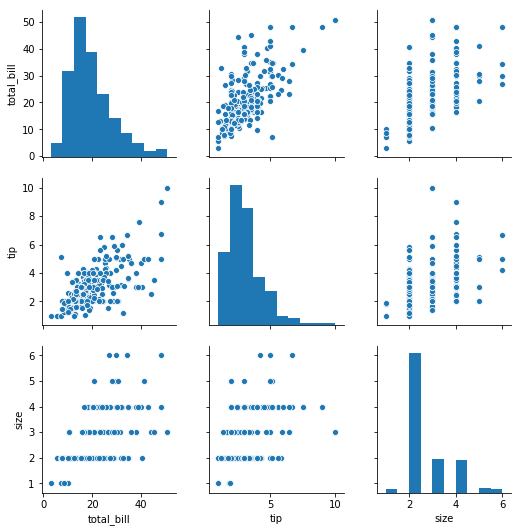

In [55]:
sns.pairplot(tips)

#### Sex에 따른 구분이 안 되어 있네? 어떻게 하면 구분할 수 있을까?

**hue 파라미터** 이용하면 됨!<br>
seaborn은 matplotlib의 확장 패키지이기 때문에 marker의 종류가 같음

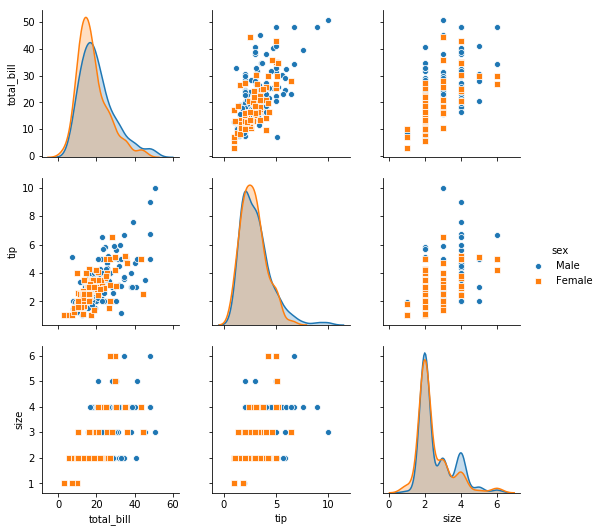

In [56]:
sns.pairplot(tips, hue="sex", markers=["o", "s"])

### 2.10. <font color="royalblue">Reg Plot & LM Plot</font>

변수들 간의 선형 관계를 확인할 때에 사용한다.

>**사용 방법:**<br>
>1. sns.regplot(`x축 데이터`,`y축 데이터`,`data`)
>2. sns.lmplot(`x축 데이터`,`y축 데이터`,`data`)

실제로 regplot보다 lmplot이 더 많이 쓰이는데 그 이유는 lmplot에서만 hue 파라미터가 적용되기 때문!

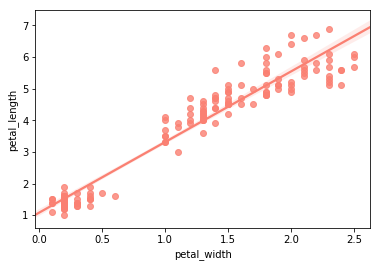

In [57]:
sns.regplot(x="petal_width", y="petal_length", data=iris, color="salmon")

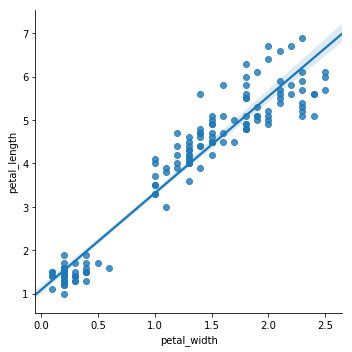

In [59]:
sns.lmplot(x="petal_width", y="petal_length", data=iris)

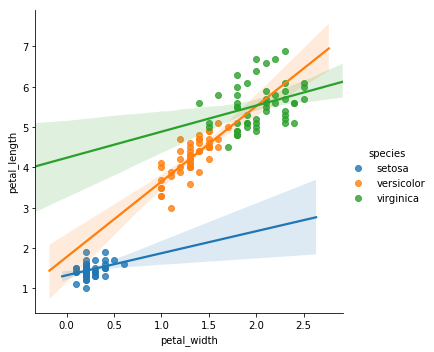

In [61]:
sns.lmplot(x="petal_width", y="petal_length", hue="species", data=iris) #species에 따라 색상 지정 가능